### Modelling

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import euclidean_distances
from geopy.distance import geodesic
from sklearn.decomposition import PCA
import re

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
toronto = pd.read_csv('../Dataset/TORONTO_FINAL.csv')

In [3]:
print(toronto.shape)
toronto.head()

(54643, 88)


,business_id,nb_id,name,latitude,longitude,lat_lon,description,categories,cuisine,food,restaurant,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,user_id,u_id,review_stars,text,date
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,48,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24
1,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,JrXC_MDp38BWwLn2SFdNsA,128,4,"In the heart of Liberty Village, Ono Poke is a...",2017-08-28 14:58:00
2,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Nq6e5N8bjgD9B46O4va_zA,152,5,"Very delicious, filling and Instagram-worthy p...",2017-09-05 02:13:30
3,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,TvenTNXyYtMNtED0i2tXfA,203,4,I was very pleasantly surprised coming to this...,2018-05-24 20:23:30
4,T6uVlXYp9Xe

### Separate business + categories and users + attributes

In [4]:
business_cat = toronto[['nb_id', 'name','latitude', 'longitude','description', 'categories', 'cuisine', 'food', 'restaurant']]

In [5]:
users_attr = toronto[['u_id', 'review_stars','nb_id','description','attri',
       'stars', 'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessParking_garage',
       'attr_BusinessParking_street', 'attr_BusinessParking_validated',
       'attr_BusinessParking_lot', 'attr_BusinessParking_valet',
       'attr_Ambience_romantic', 'attr_Ambience_intimate',
       'attr_Ambience_classy', 'attr_Ambience_hipster',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor', 'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [6]:
business_cat = business_cat.drop_duplicates(subset=['nb_id','description'])
print(business_cat.shape)
business_cat.head()

(5764, 9)


,nb_id,name,latitude,longitude,description,categories,cuisine,food,restaurant
0,0,'ONO Poké Bar,43.639526,-79.415855,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars"
7,1,00 Gelato,43.646312,-79.391329,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"stars_3.5, attr_RestaurantsPriceRange2_2, attr...","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops"
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"stars_2.0, attr_RestaurantsDelivery_1, attr_Re...","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants
58,4,100 Percent Korean,43.825482,-79.298528,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Korean, Restaurants",Korean,nil,Restaurants


In [7]:
print(users_attr.shape)
users_attr.head()

(54643, 76)


,u_id,review_stars,nb_id,description,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,48,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,128,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,152,5,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,203,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,248,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [8]:
business = toronto[['nb_id', 'name','latitude', 'longitude', 'lat_lon',
                    'categories', 'cuisine', 'food', 'restaurant',
       'stars', 'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessParking_garage',
       'attr_BusinessParking_street', 'attr_BusinessParking_validated',
       'attr_BusinessParking_lot', 'attr_BusinessParking_valet',
       'attr_Ambience_romantic', 'attr_Ambience_intimate',
       'attr_Ambience_classy', 'attr_Ambience_hipster',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor', 'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [9]:
business = business.drop_duplicates(subset=['nb_id'])
print(business.shape)
business.head()

(5764, 80)


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants,2.0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.2985280012","Korean, Restaurants",Korean,nil,Restaurants,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [10]:
business.categories = business.categories.fillna('nil')

In [11]:
print(business.shape)
business.categories.isnull().sum()

(5764, 80)


0

### EDA on `users_attr`

Value_counts on user_ids to show the number of restaurants each user has been to/ reviewed

In [12]:
# groupby can also be used
# users_attr.groupby('u_id')['nb_id'].agg('count').sort_values(ascending = False)
users_attr.u_id.value_counts()[:10]

78     964
172    549
156    491
304    442
319    413
22     399
92     387
8      376
233    347
200    332
Name: u_id, dtype: int64

Value_counts on business_ids to show the number of patronage each restaurant has

In [13]:
users_attr.nb_id.value_counts()[:10]

2322    171
3360    160
4117    145
4021    134
339     130
2254    128
332     120
5665    116
1856    115
5460    115
Name: nb_id, dtype: int64

### Aggregrating the users info and profiling them

In [14]:
def agg_function(df):
    a = []
    nb_id_count = df.groupby('u_id')['nb_id'].agg('count')
    stars_agg = round(df.groupby('u_id')['stars'].agg('mean'),0)
    users_stars = round(df.groupby('u_id')['review_stars'].agg('mean'),0)
    for i in df.columns:
        if ('attr_' in i) and (df[i].nunique() <= 2):
            a.append(i)
            binary_sum = df.groupby('u_id')[a].agg('sum')
        else:
            if ('attr_' in i) and (df[i].nunique() > 2):
                px_range_agg = df.groupby('u_id')[i].agg('mean')
                px_range_agg = round(px_range_agg,0)
                    
    df_agg = pd.concat([nb_id_count, users_stars, stars_agg, px_range_agg, binary_sum], axis=1, sort = False)
    
    return df_agg

In [15]:
users_agg = agg_function(users_attr)
users_agg.head()

,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
u_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0
1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0
2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0
3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0
4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0


In [16]:
users_agg = users_agg.reset_index()

In [17]:
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0


#### Profile users based on clustering

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
baseline = 1
attr_list = ['stars']
for i in users_agg.columns:
    if 'attr_' in i:
        non_zero_values = users_agg.loc[users_agg[i] != 0].shape[0]
        percent_full = non_zero_values/users_agg.shape[0]
        if percent_full >= baseline:
            attr_list.append(i)
            count_i = len(attr_list)
            #print(i, round(percent_full,2),'\n')

print("We have {} users".format(users_agg.shape[0]))
print('We will be using our {} attributes to cluster our above users'.format(users_agg.shape[1] - 2))
print("Total number of attributes that has more than {}% filled = {}\n".format(int(baseline*100), count_i))
print(attr_list)

We have 421 users
We will be using our 72 attributes to cluster our above users
Total number of attributes that has more than 100% filled = 26

['stars', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsDelivery', 'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids', 'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups', 'attr_RestaurantsTableService', 'attr_WheelchairAccessible', 'attr_BusinessAcceptsCreditCards', 'attr_BusinessParking_street', 'attr_BusinessParking_lot', 'attr_Ambience_casual', 'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner', 'attr_GoodForMeal_brunch', 'attr_WiFi_free', 'attr_RestaurantsAttire_casual', 'attr_NoiseLevel_average', 'attr_NoiseLevel_loud', 'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar']


In [20]:
def subplot_histplot(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.2, color='r')

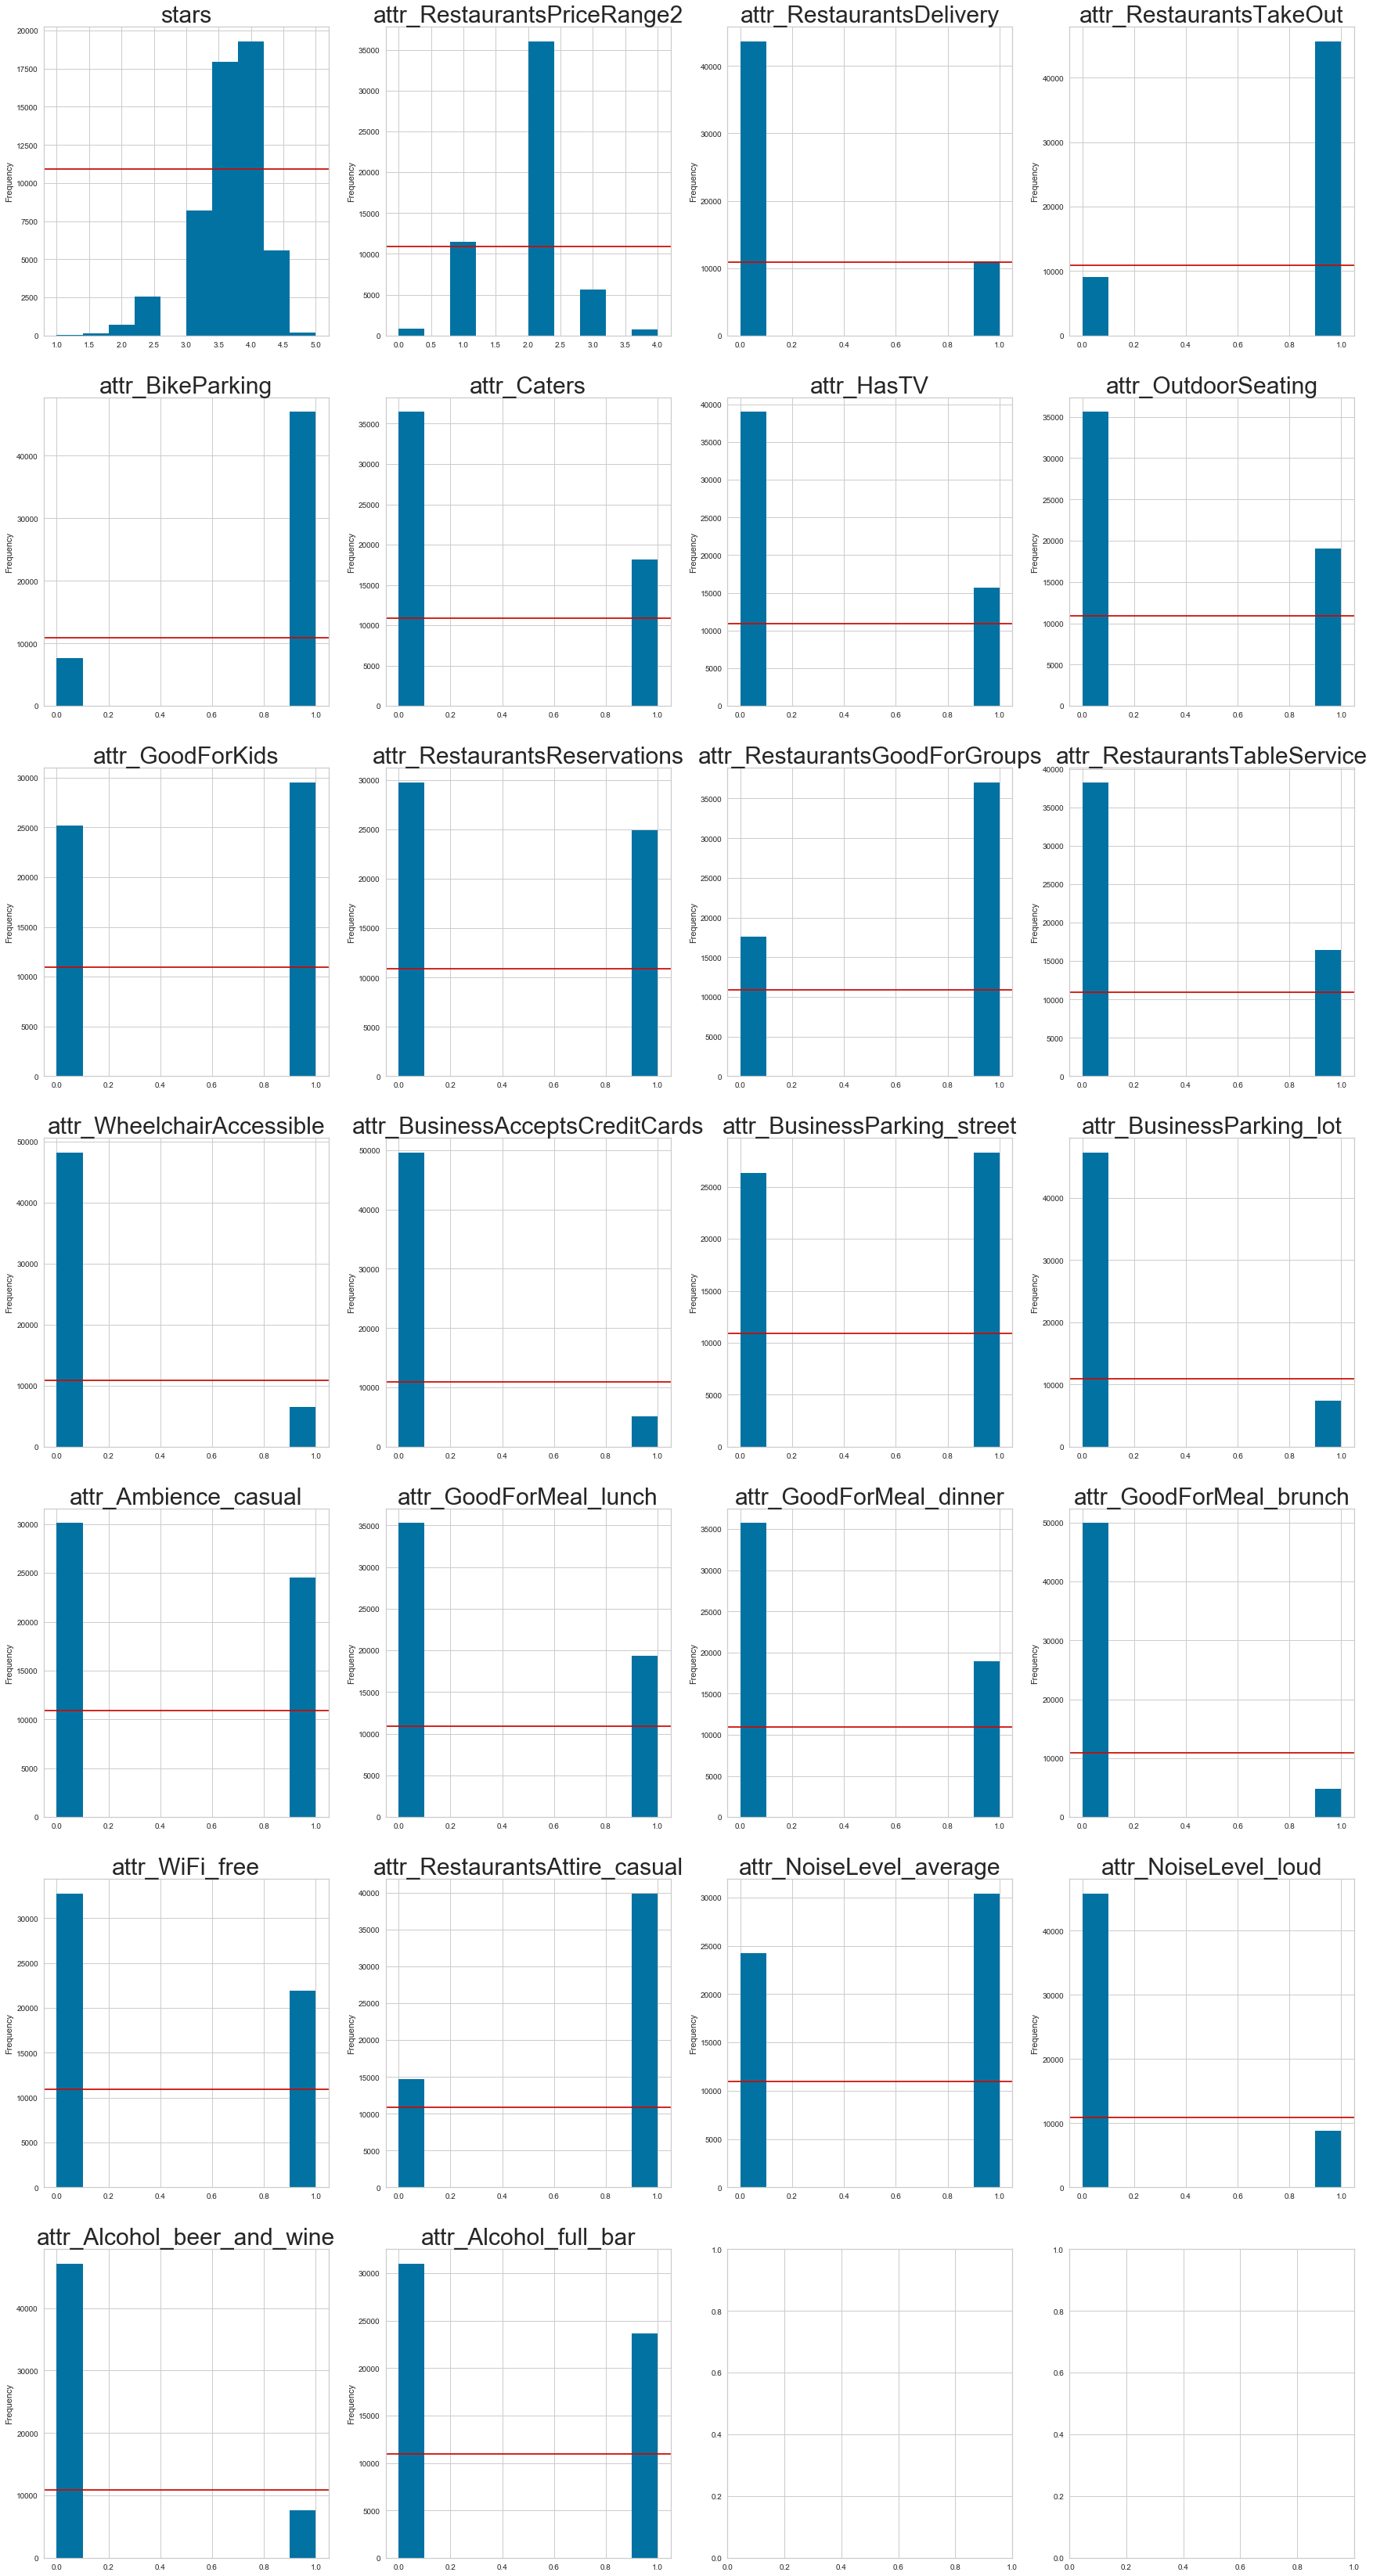

In [21]:
subplot_histplot(users_attr, attr_list, attr_list)

In [22]:
final_attr_list = ['stars', 'attr_RestaurantsPriceRange2','attr_RestaurantsDelivery',
                   'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids', 
                   'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups', 
                   'attr_RestaurantsTableService','attr_BusinessParking_street',
                   'attr_Ambience_casual', 'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
                   'attr_WiFi_free', 'attr_RestaurantsAttire_casual', 
                   'attr_NoiseLevel_average','attr_Alcohol_full_bar']

In [23]:
X = users_agg.loc[:, final_attr_list]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

KMEANS CLUSTERING

In [24]:
# (thread) How many K here?
# I do: Fit a k-means clustering model
km = KMeans(n_clusters=5, random_state=42)  # 414 / 10 = 40
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
print(len(X_sc[:1][0]))
X_sc[:1][0]

18


array([ 0.46557814, -0.08471737,  0.52988721,  1.15711236,  1.50057522,
        2.42873845,  0.972489  ,  1.5147796 ,  1.41222407,  0.2739576 ,
        1.18614611,  1.21412521,  0.81306946,  0.89130893,  1.77304622,
        1.18992418,  1.38003888,  1.66574626])

In [26]:
# Check out centroids - I have 10 centroids for the 10 clusters I have defined
len(km.cluster_centers_)

5

In [27]:
# Option 1: Class attribute
km.labels_

# Option 2: Predict
km.predict(X_sc)

array([0, 1, 1, 0, 0, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       4, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 4, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 4, 4, 0, 1, 0,
       1, 1, 0, 1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 4, 1,
       0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 1, 1, 4, 0, 0, 1, 0, 1, 1, 1, 0, 4,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 4, 1, 1, 1, 4, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 4, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [28]:
# attach predicted cluster to original points
users_agg['cluster'] = km.labels_
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cluster
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0,0
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0,1
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0,1
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0,0


In [29]:
silhouette_score(X_sc, km.labels_)

0.3986812384237006

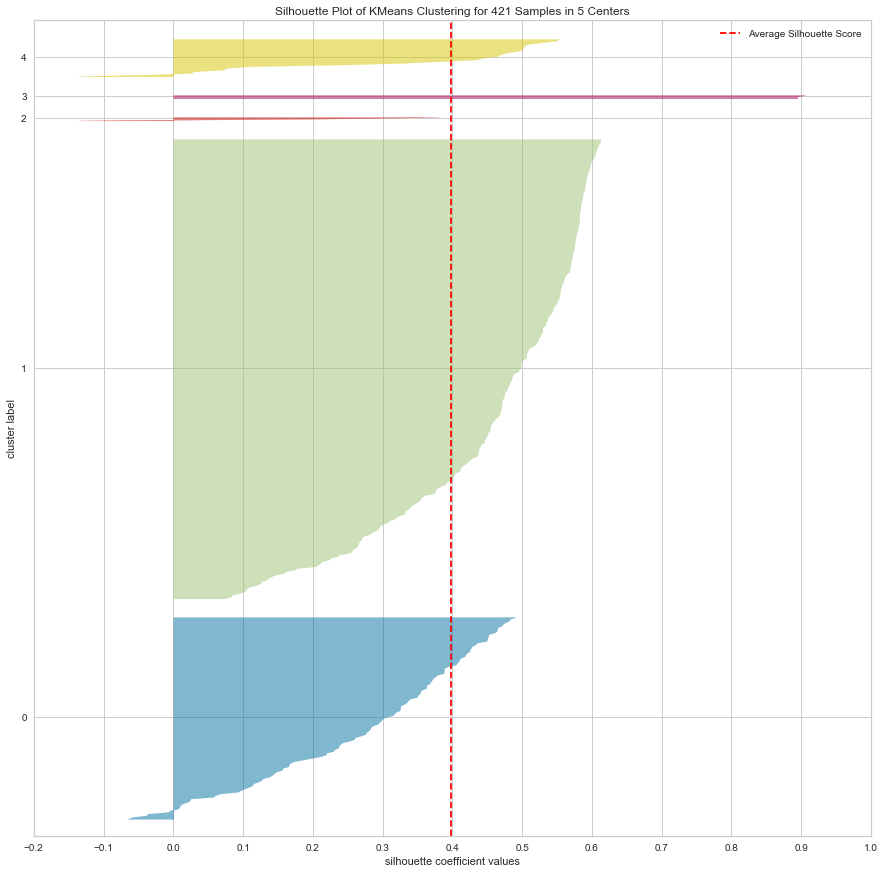

In [30]:
plt.figure(figsize = (15,15))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X_sc)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [31]:
scores = []
max_sil = 0
for k in range(2, 20):   # 245 - 23 per cluster, 281 - 20 
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    if sil > max_sil:
        max_sil = sil
        ideal_k = k
        
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']


In [32]:
rough_clusters = round(414/ideal_k,0)
print("Ideal clustering:\nNumber of clusters: {}\nSilhouette score: {}\nRough number of restaurants in clusters: {}".format(ideal_k, max_sil, rough_clusters))
score_df.head()

Ideal clustering:
Number of clusters: 2
Silhouette score: 0.6389058700857531
Rough number of restaurants in clusters: 207.0


,k,inertia,silhouette
0,2,4222.432948,0.638906
1,3,3053.819254,0.408771
2,4,2347.166624,0.384555
3,5,1930.120247,0.374352
4,6,1597.190487,0.380039


Text(0.5, 1.0, 'Silhouette Score over k')

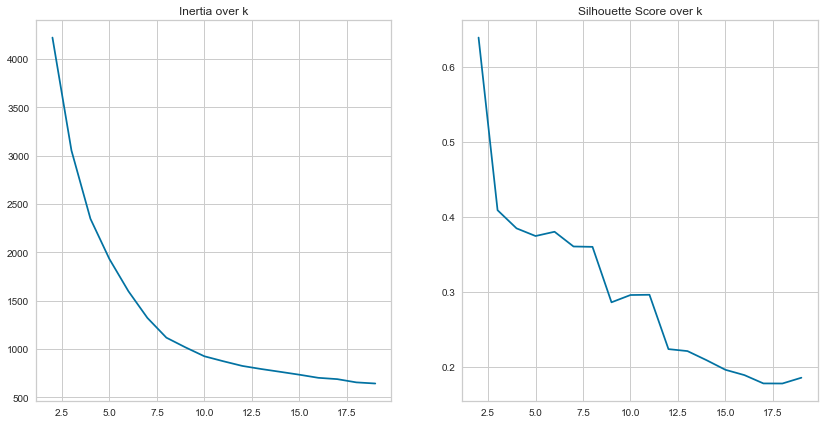

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

DBSCAN CLUSTERING

In [34]:
import decimal

In [35]:
def plot_results(df, cl):
    X = df.loc[:, attr_list]
    X_sc = scale_matrix(X)
    cl.fit(X_sc)
    df['cluster'] = cl.labels_
    sil = silhouette_score(X_sc, cl.labels_)
    print(f"SILHOUETTE SCORE = {sil}")
    df.plot(kind='scatter', c='cluster', colormap='tab20')

In [36]:
def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

eps_list = list(float_range(1, 2.5, '0.05'))
eps_list

samples_list = []
for value in range(2,16):
    samples_list.append(value)

# eps_list, samples_list

In [37]:
fid = users_agg

In [38]:
def find_ideal_dbscan(eps, num_samples):   
    for i in num_samples:
        for j in eps:
            dbscan = DBSCAN(eps = j,min_samples = i )
            dbscan.fit(X_sc)
            sil_sc = silhouette_score(X_sc, dbscan.labels_)
            fid['dbs_cluster'] = dbscan.labels_
            v_counts = fid['dbs_cluster'].value_counts()
            v_outliers = fid['dbs_cluster'].value_counts()[-1]
            
            if sil_sc > 0.307:
                print('eps: {}, num_samples: {}'.format(j,i))                
                print(v_counts)
                print("Number of outlier points: {}".format(v_outliers))
                print('Sil score: {}'.format(sil_sc))
                print('')

In [39]:
find_ideal_dbscan(eps_list, samples_list)

eps: 1.6, num_samples: 8
 0    299
 1     65
-1     57
Name: dbs_cluster, dtype: int64
Number of outlier points: 57
Sil score: 0.30801581888649754

eps: 1.65, num_samples: 8
 0    301
 1     66
-1     54
Name: dbs_cluster, dtype: int64
Number of outlier points: 54
Sil score: 0.30790704507166416

eps: 1.75, num_samples: 13
 0    304
 1     65
-1     52
Name: dbs_cluster, dtype: int64
Number of outlier points: 52
Sil score: 0.3073173426070093

eps: 1.85, num_samples: 15
 0    304
 1     65
-1     52
Name: dbs_cluster, dtype: int64
Number of outlier points: 52
Sil score: 0.3073173426070093



In [40]:
dbscan = DBSCAN(eps = 1.65,min_samples = 8 )
dbscan.fit(X_sc)

DBSCAN(algorithm='auto', eps=1.65, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [41]:
set(dbscan.labels_)

{-1, 0, 1}

In [42]:
# Create cluster column
users_agg['dbs_cluster'] = dbscan.labels_

In [43]:
# Value counts for each cluster
users_agg['dbs_cluster'].value_counts()

 0    301
 1     66
-1     54
Name: dbs_cluster, dtype: int64

In [44]:
silhouette_score(X_sc, dbscan.labels_)

0.30790704507166416

In [45]:
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cluster,dbs_cluster
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0,0,-1
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0,1,0
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0,1,0
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0,0,0


HIERARCHICAL CLUSTERING

In [46]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [47]:
data_scaled = normalize(X)

In [48]:
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_BusinessParking_street,attr_Ambience_casual,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_WiFi_free,attr_RestaurantsAttire_casual,attr_NoiseLevel_average,attr_Alcohol_full_bar
0,0.009451,0.004725,0.080332,0.170114,0.186653,0.288249,0.257534,0.266984,0.380394,0.106321,0.271710,0.231544,0.155938,0.155938,0.262259,0.370943,0.302425,0.281161
1,0.026074,0.013037,0.149927,0.228150,0.156446,0.136890,0.404151,0.097779,0.280298,0.104297,0.299854,0.254224,0.215113,0.169483,0.215113,0.436744,0.378077,0.097779
2,0.025805,0.012902,0.122573,0.193536,0.199988,0.206439,0.303207,0.225792,0.354817,0.167731,0.329012,0.245146,0.167731,0.206439,0.219341,0.393524,0.277402,0.219341
3,0.015400,0.007700,0.077001,0.134752,0.223303,0.219453,0.173253,0.284904,0.411956,0.111652,0.304155,0.250254,0.192503,0.161702,0.204053,0.365755,0.288754,0.327255
4,0.012756,0.006378,0.127563,0.159454,0.175400,0.143509,0.318908,0.274261,0.379501,0.207290,0.258316,0.235992,0.178589,0.204101,0.165832,0.420959,0.306152,0.220047


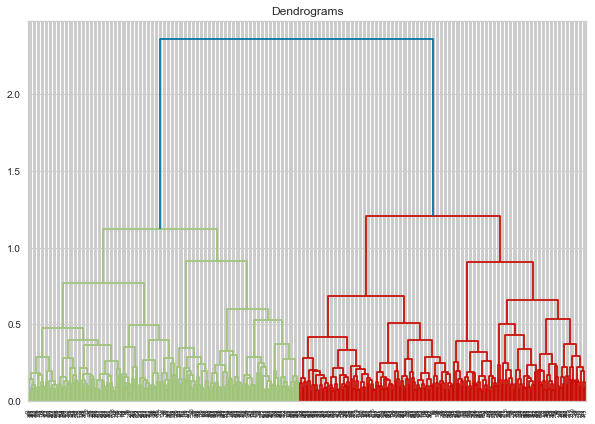

In [49]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a **threshold of 1** and cut the dendrogram:

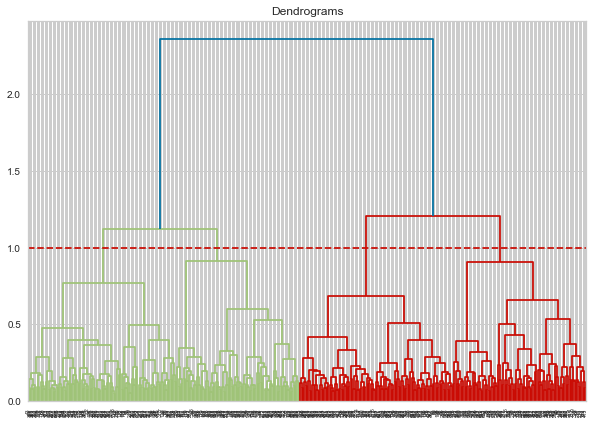

In [50]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at 4 points. Let’s now apply hierarchical clustering for 4 clusters

In [51]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_hc = cluster.fit_predict(data_scaled)
y_hc

array([3, 1, 3, 0, 2, 2, 1, 3, 3, 1, 1, 3, 1, 2, 1, 3, 2, 0, 3, 3, 2, 3,
       3, 1, 1, 1, 1, 0, 2, 3, 3, 1, 0, 0, 0, 0, 2, 3, 1, 0, 1, 0, 2, 3,
       3, 2, 0, 3, 0, 3, 0, 1, 0, 1, 1, 3, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2,
       0, 3, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 3,
       1, 2, 3, 3, 3, 2, 0, 0, 1, 1, 1, 3, 1, 0, 1, 3, 2, 2, 3, 0, 2, 2,
       0, 0, 1, 3, 2, 0, 0, 3, 3, 3, 1, 2, 3, 3, 0, 1, 0, 3, 0, 0, 0, 2,
       2, 3, 2, 2, 0, 3, 3, 0, 0, 1, 2, 1, 3, 2, 3, 3, 0, 3, 3, 1, 2, 2,
       3, 2, 0, 2, 0, 3, 2, 3, 1, 2, 2, 0, 3, 0, 2, 0, 0, 0, 3, 1, 2, 0,
       1, 2, 2, 2, 0, 1, 1, 2, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1, 2, 3, 3, 0,
       2, 1, 3, 0, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 3, 3, 1, 1, 2, 2, 0, 3,
       3, 3, 3, 0, 2, 2, 2, 3, 0, 3, 1, 0, 1, 1, 3, 2, 2, 1, 3, 0, 3, 1,
       0, 1, 1, 2, 1, 2, 2, 3, 3, 2, 3, 1, 2, 3, 0, 1, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 3, 2, 2, 1, 0, 0, 3, 0, 0, 1, 1, 3, 2, 1, 3, 1, 3, 0, 2,
       1, 2, 2, 2, 1, 3, 0, 3, 0, 2, 1, 2, 2, 2, 0,

In [52]:
users_agg['hc_cluster'] = cluster.labels_

In [53]:
# Value counts for each cluster
users_agg['hc_cluster'].value_counts()

2    115
3    112
1    101
0     93
Name: hc_cluster, dtype: int64

I will be using my clusters generated from Hierarchical Clustering as the clusters achieved are uniform clusters

---------------

### EDA on clusters

In [54]:
users_agg['hc_cluster'].value_counts()

2    115
3    112
1    101
0     93
Name: hc_cluster, dtype: int64

In [ ]:
def subplot_clusters(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.2, color='r')

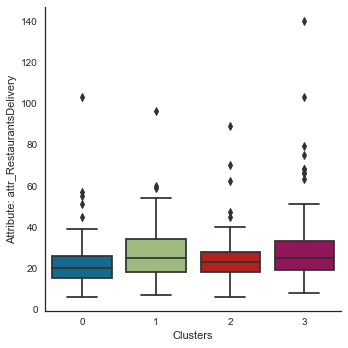

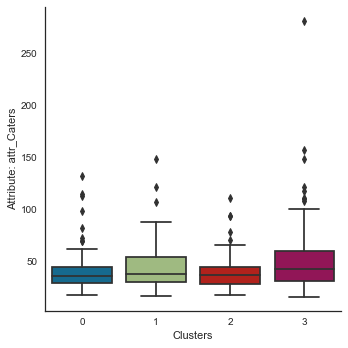

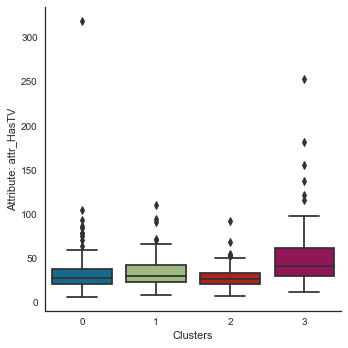

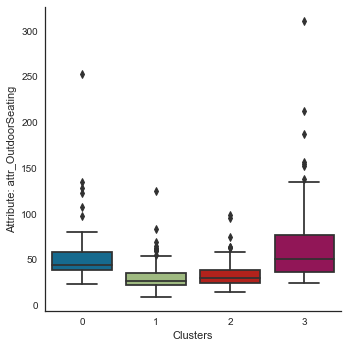

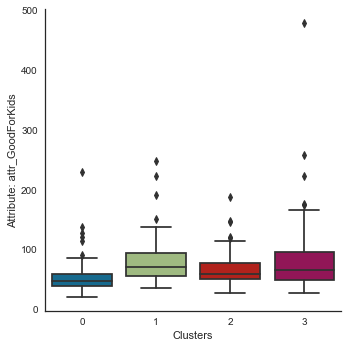

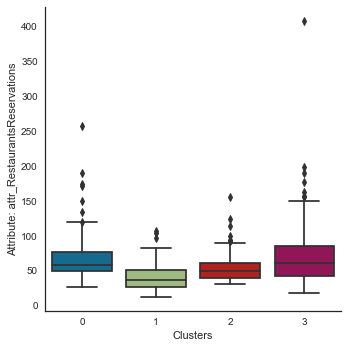

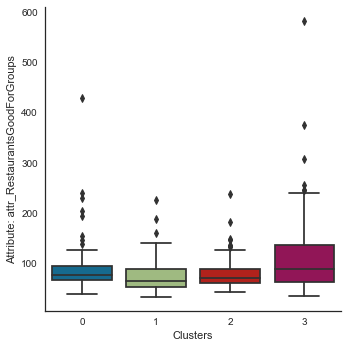

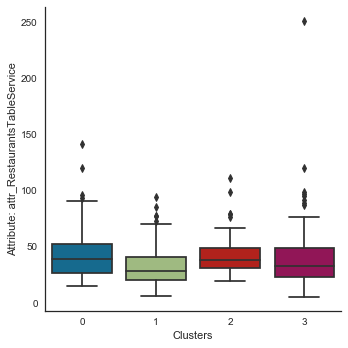

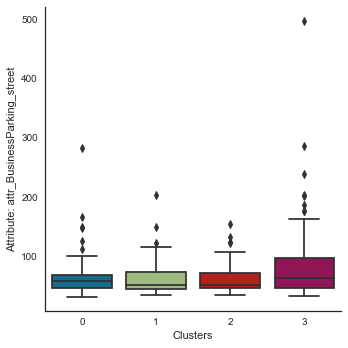

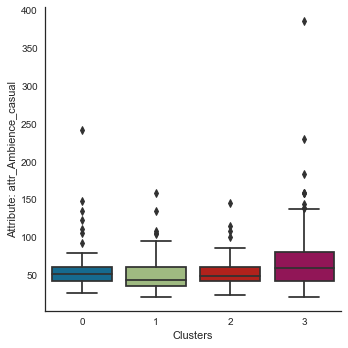

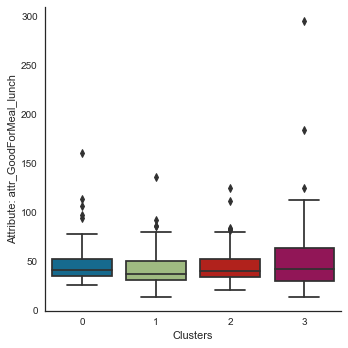

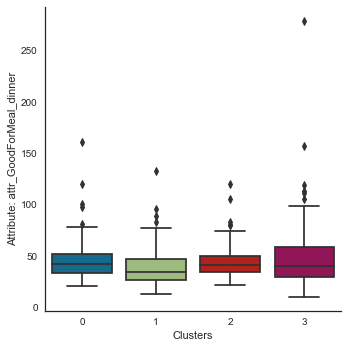

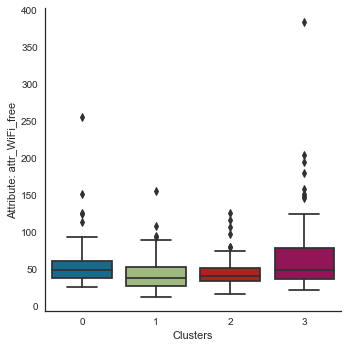

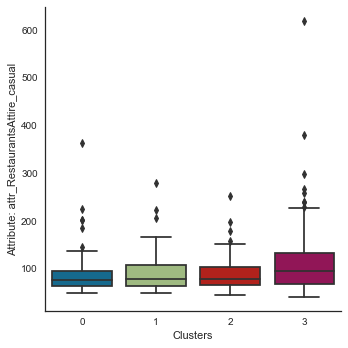

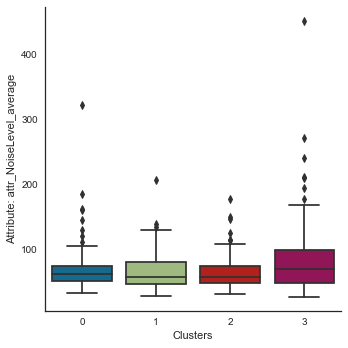

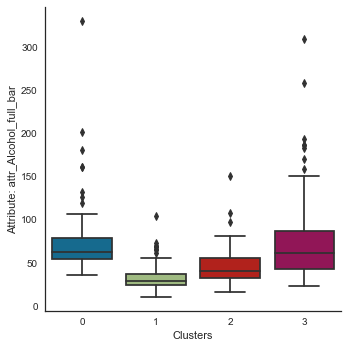

In [115]:
for i in users_agg.columns:
    if i in final_attr_list[2:]:
        with sns.axes_style(style='ticks'):
            g = sns.catplot("hc_cluster", i, data=users_agg, kind="box")
            g.set_axis_labels("Clusters", "Attribute: " + i);

Boxplot to see relationship between clusters

Cluster 1


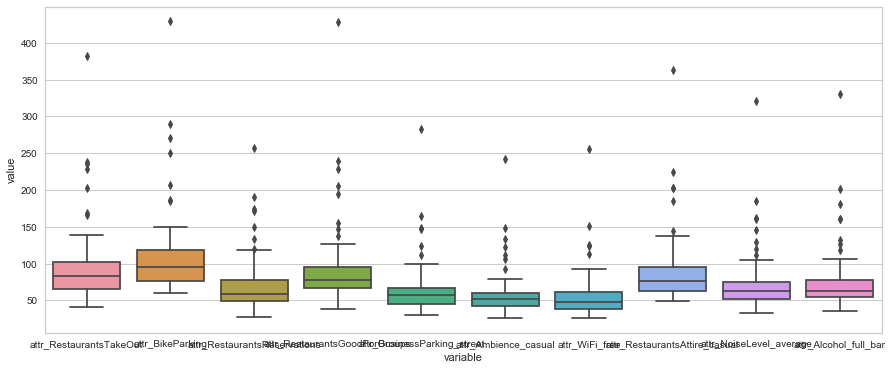

                               value
variable                            
attr_BikeParking                9931
attr_RestaurantsTakeOut         8710
attr_RestaurantsGoodForGroups   8488
attr_RestaurantsAttire_casual   8137
attr_Alcohol_full_bar           6790
attr_NoiseLevel_average         6610
attr_RestaurantsReservations    6468
attr_BusinessParking_street     5844
attr_Ambience_casual            5294
attr_WiFi_free                  5056

Cluster 2


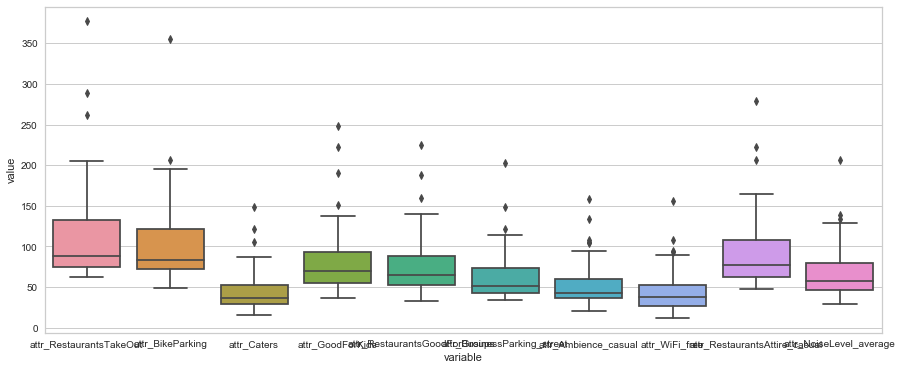

                               value
variable                            
attr_RestaurantsTakeOut        11080
attr_BikeParking               10289
attr_RestaurantsAttire_casual   9098
attr_GoodForKids                7945
attr_RestaurantsGoodForGroups   7407
attr_NoiseLevel_average         6684
attr_BusinessParking_street     6318
attr_Ambience_casual            5256
attr_WiFi_free                  4437
attr_Caters                     4410

Cluster 3


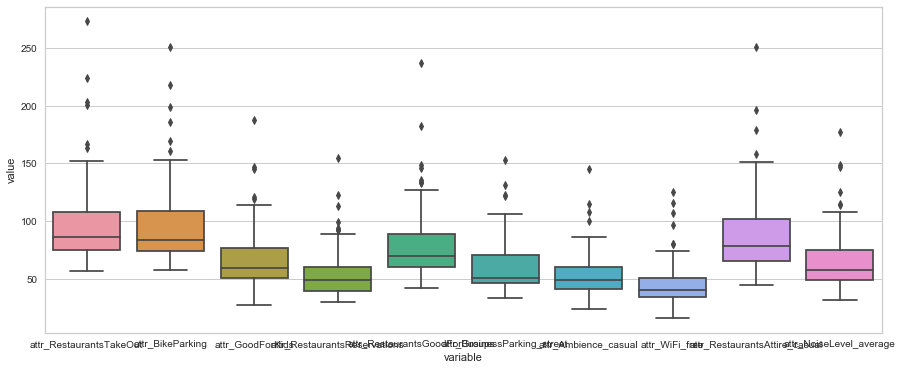

                               value
variable                            
attr_RestaurantsTakeOut        11178
attr_BikeParking               10954
attr_RestaurantsAttire_casual   9958
attr_RestaurantsGoodForGroups   8933
attr_GoodForKids                7614
attr_NoiseLevel_average         7468
attr_BusinessParking_street     6854
attr_RestaurantsReservations    6139
attr_Ambience_casual            6075
attr_WiFi_free                  5203

Cluster 4


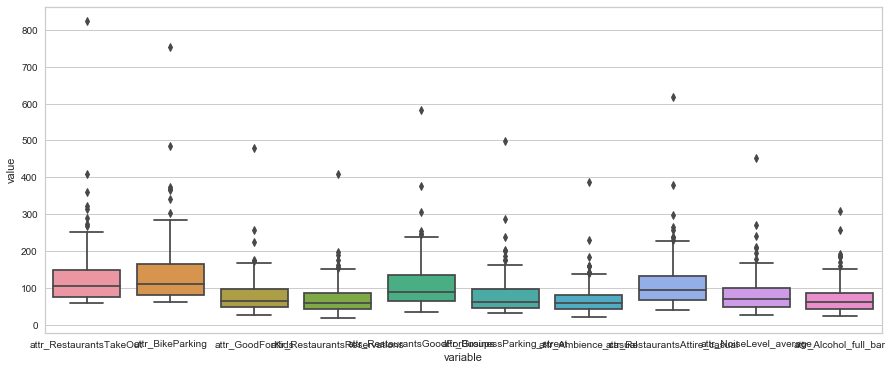

                               value
variable                            
attr_BikeParking               15815
attr_RestaurantsTakeOut        14630
attr_RestaurantsAttire_casual  12700
attr_RestaurantsGoodForGroups  12209
attr_NoiseLevel_average         9645
attr_BusinessParking_street     9268
attr_GoodForKids                9036
attr_Alcohol_full_bar           8351
attr_RestaurantsReservations    8086
attr_Ambience_casual            7919



In [246]:
print("Boxplot to see relationship between clusters\n")
for i in range(4):
    
    c1 = pd.melt(users_agg[users_agg['hc_cluster'] == i].iloc[:,5:-3])
    c1_list = c1.groupby('variable')[['value']].sum().sort_values(by = 'value',ascending = False).index[:10].tolist()
    plt.figure(figsize= (15,6))
    sns.boxplot(x="variable", y="value", data=c1[c1.variable.isin(c1_list)])

    print('Cluster {}'.format(i+1))
    plt.show()
    df = c1.groupby('variable')[['value']].sum().sort_values(by = 'value',ascending = False).head(10)
    print(df)
    print("")

_____________

### Look at individual users

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [57]:
users_hc = users_agg[['u_id','hc_cluster']]
users_hc.head()

,u_id,hc_cluster
0,0,3
1,1,1
2,2,3
3,3,0
4,4,2


In [58]:
toronto = pd.merge(toronto, users_hc, on = 'u_id')

In [59]:
users_business = toronto[['u_id','nb_id','review_stars','hc_cluster']]
users_business.head()

,u_id,nb_id,review_stars,hc_cluster
0,48,0,4,0
1,48,240,3,0
2,48,350,4,0
3,48,378,3,0
4,48,389,4,0


#### 1. User X

In [60]:
user = 13

In [61]:
user_x = users_attr.loc[users_attr.u_id == user]
print(user_x.shape)

(102, 76)


In [62]:
user_x_agg = agg_function(user_x)

num_review = user_x_agg.iloc[0][0]
print('number of reviews:',num_review)
print("\nPercent filled for columns filled more than 25%:")

col_to_cluster = ['stars','attr_RestaurantsPriceRange2']
for i in user_x.columns:
    if len(user_x[i].value_counts()) == 2:
        # print(user_71_agg[i])
        percent_filled = round(user_x_agg[i].iloc[0]/num_review*100,1)
        if percent_filled >= 25:
            col_to_cluster.append(i)
            print("{}: {}%".format(i,percent_filled))
print('')
# print('Number of columns to cluster: {}\n'.format(len(col_to_cluster)))
# print('Columns to cluster:\n{}'.format(col_to_cluster))

# user_xb = user_x.drop_duplicates(subset= 'nb_id')
user_xb = user_x.nb_id.tolist()
user_x_business = business.loc[business.nb_id.isin(user_xb)]

print(user_x_agg.T.head())
print('\nNumber of unique places: {}'.format(user_x_business.shape[0]))
user_x_business.head()

number of reviews: 102.0

Percent filled for columns filled more than 25%:
attr_RestaurantsDelivery: 25.5%
attr_RestaurantsTakeOut: 86.3%
attr_BikeParking: 71.6%
attr_Caters: 42.2%
attr_OutdoorSeating: 26.5%
attr_GoodForKids: 51.0%
attr_RestaurantsReservations: 48.0%
attr_RestaurantsGoodForGroups: 64.7%
attr_RestaurantsTableService: 41.2%
attr_BusinessParking_street: 53.9%
attr_Ambience_casual: 51.0%
attr_GoodForMeal_lunch: 43.1%
attr_GoodForMeal_dinner: 42.2%
attr_WiFi_free: 35.3%
attr_RestaurantsAttire_casual: 71.6%
attr_NoiseLevel_average: 48.0%
attr_Alcohol_full_bar: 41.2%

u_id                            13
nb_id                        102.0
review_stars                   4.0
stars                          4.0
attr_RestaurantsPriceRange2    2.0
attr_RestaurantsDelivery      26.0

Number of unique places: 93


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2604,306,Bake Code - North York,43.764052,-79.411873,"43.7640519918,-79.41187296060001","Restaurants, Bakeries",nil,nil,"Restaurants, Bakeries",3.5,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3547,354,Bar Begonia,43.675201,-79.406366,"43.675200700000005,-79.4063661","French, Restaurants",French,nil,Restaurants,3.5,0,3,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


Step 1: Find the attribute cluster user x is in
- Use `users_hc` df

In [63]:
cluster = users_hc.loc[users_hc.u_id == user, 'hc_cluster'].item()
cluster

2

Step 2: Use collaborative filtering to find the restaurants suited to user 100 based on attributes

In [64]:
users_business_x = users_business.loc[users_business.hc_cluster == cluster]
users_business_x = users_business_x.drop_duplicates(subset = 'nb_id')
print('Number of places based on collaborative filtering: {}'.format(users_business_x.shape[0]))
business_x = business[business.nb_id.isin(users_business_x.nb_id.tolist())]
business_x.head()

Number of places based on collaborative filtering: 3231


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
58,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.2985280012","Korean, Restaurants",Korean,nil,Restaurants,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
74,5,120 Diner,43.652151,-79.375478,"43.6521506,-79.3754775","Comfort Food, Restaurants, Diners",Comfort Food,nil,"Restaurants, Diners",4.0,1,2,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0


Step 3: Use content based filtering to find similar restaurants for user 100

In [65]:
# Look at all the restaurants user_100 goes to
user_x_business.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [66]:
# Look at all the restaurants people like user_100 go to
business_x.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [67]:
user_x_blist = user_x_business.nb_id.tolist()
user_x_blist[:10]

[63, 199, 240, 306, 354, 355, 360, 643, 680, 690]

In [68]:
# get matrix for categories in clusterd businesses
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
cv_matrix = cv.fit_transform(business_x['categories'])

In [69]:
cv_matrix.shape

(3231, 1665)

In [70]:
cosine_sim = linear_kernel(cv_matrix, cv_matrix)

In [71]:
business_x = business_x.reset_index()
business_id = business_x[['name','categories','cuisine','food','restaurant']]
indices = pd.Series(business_x.index, index=business_x['nb_id'])

In [262]:
def get_recommendations(businesses):
    for x in businesses:
        idx = indices[x]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:201]
        desc_indices = [i[0] for i in sim_scores]
        return business_id.iloc[desc_indices]

In [263]:
# So these are the recommended restaurants for user 100
user_x_rec = get_recommendations(user_x_blist)
user_x_rec.head()

,name,categories,cuisine,food,restaurant
30,AKA-ONI Izakaya,"Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants"
1336,KINKA IZAKAYA ORIGINAL,"Japanese, Tapas/Small Plates, Bars, Restaurant...",Japanese,Tapas/Small Plates,"Bars, Restaurants, Tapas Bars, Pubs"
1361,Kanpai Snack Bar,"Asian Fusion, Taiwanese, Tapas/Small Plates, T...","Asian Fusion, Taiwanese",Tapas/Small Plates,"Tapas Bars, Restaurants"
1420,Kintaro Izakaya,"Japanese, Tapas/Small Plates, Restaurants, Sus...",Japanese,Tapas/Small Plates,"Restaurants, Sushi Bars, Bars"
2502,Spark Espresso and Fresh Bar,"Vegetarian, Coffee & Tea, Salad, Tapas/Small P...",Vegetarian,"Coffee & Tea, Salad, Tapas/Small Plates, Juice...","Tapas Bars, Cocktail Bars, Bars, Restaurants, ..."


In [295]:
user_x_rec[user_x_rec.food.str.contains('Breakfast & Brunch')].cuisine.value_counts()

Comfort Food, American (Traditional)                    1
Japanese, Mexican, Asian Fusion, Korean                 1
Canadian (New)                                          1
Asian Fusion, Specialty Food, Comfort Food, Japanese    1
Japanese, Barbeque, Vegan                               1
Mediterranean, French                                   1
American (New), Canadian (New)                          1
nil                                                     1
Mexican, Latin American                                 1
Asian Fusion                                            1
Japanese                                                1
Vegetarian, Canadian (New)                              1
Name: cuisine, dtype: int64

In [265]:
# Lets look at user 100 profile and see what kinds of places does he go to most often
user_x_business.head()

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2604,306,Bake Code - North York,43.764052,-79.411873,"43.7640519918,-79.41187296060001","Restaurants, Bakeries",nil,nil,"Restaurants, Bakeries",3.5,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3547,354,Bar Begonia,43.675201,-79.406366,"43.675200700000005,-79.4063661","French, Restaurants",French,nil,Restaurants,3.5,0,3,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [266]:
def buisness_cat_plot(df, colname):
    business_colname = ', '.join(df[colname])
    colname_x = pd.DataFrame(business_colname.split(', '),columns=['colname'])
    
    x = colname_x.colname.value_counts()
    x = x.sort_values(ascending=False)
    x = x.iloc[0:10] 
    
    plt.figure(figsize=(16,4))
    ax = sns.barplot(x.index, x.values, alpha=0.8)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title("Distribution of restaurants by {}s".format(colname))
    plt.show()
    return x

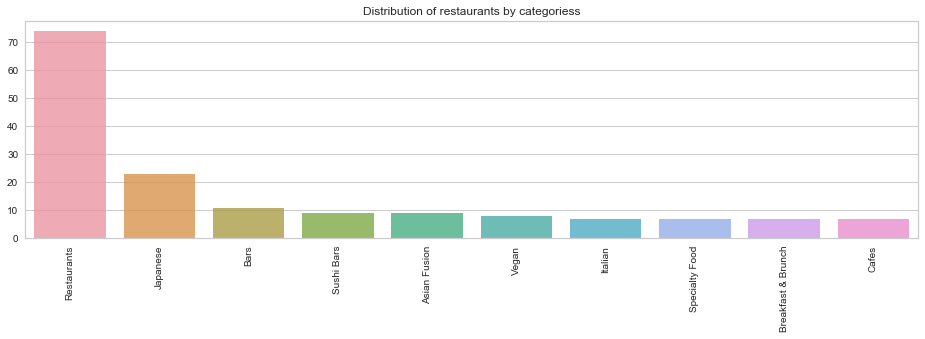

Restaurants           74
Japanese              23
Bars                  11
Sushi Bars             9
Asian Fusion           9
Vegan                  8
Italian                7
Specialty Food         7
Breakfast & Brunch     7
Cafes                  7
Name: colname, dtype: int64

In [267]:
buisness_cat_plot(user_x_business[user_x_business.cuisine != 'nil'],'categories')

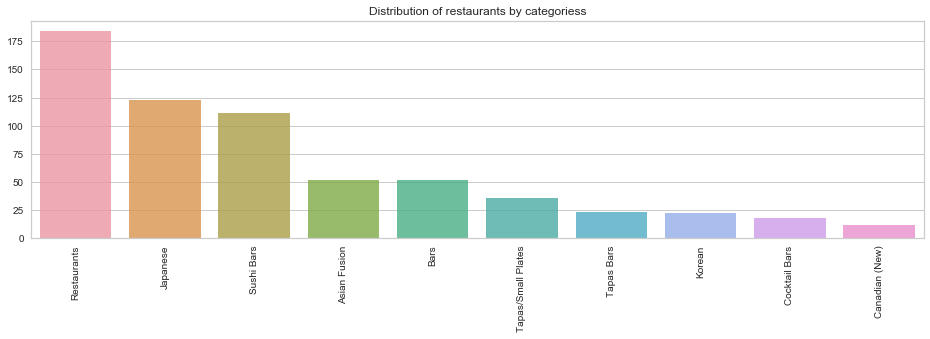

Restaurants           184
Japanese              123
Sushi Bars            111
Asian Fusion           52
Bars                   52
Tapas/Small Plates     36
Tapas Bars             23
Korean                 22
Cocktail Bars          18
Canadian (New)         12
Name: colname, dtype: int64

In [268]:
buisness_cat_plot(user_x_rec[user_x_rec.cuisine != 'nil'],'categories')

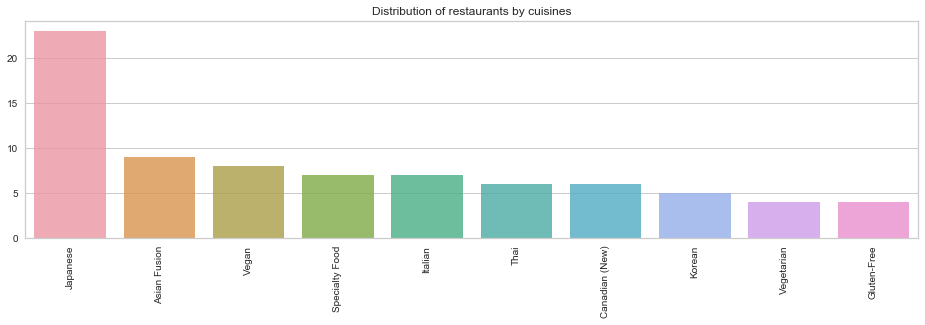

Japanese          23
Asian Fusion       9
Vegan              8
Specialty Food     7
Italian            7
Thai               6
Canadian (New)     6
Korean             5
Vegetarian         4
Gluten-Free        4
Name: colname, dtype: int64

In [269]:
buisness_cat_plot(user_x_business[user_x_business.cuisine != 'nil'],'cuisine')

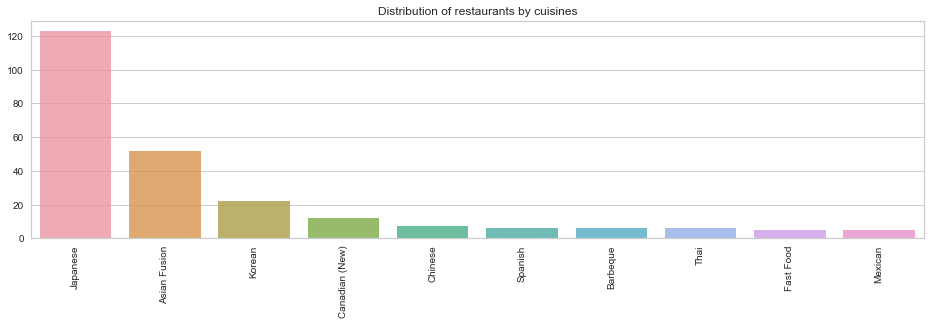

Japanese          123
Asian Fusion       52
Korean             22
Canadian (New)     12
Chinese             7
Spanish             6
Barbeque            6
Thai                6
Fast Food           5
Mexican             5
Name: colname, dtype: int64

In [270]:
buisness_cat_plot(user_x_rec[user_x_rec.cuisine != 'nil'],'cuisine')

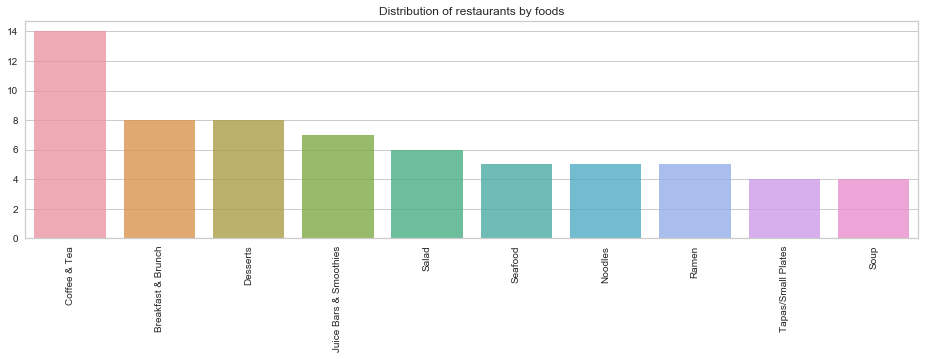

Coffee & Tea              14
Breakfast & Brunch         8
Desserts                   8
Juice Bars & Smoothies     7
Salad                      6
Seafood                    5
Noodles                    5
Ramen                      5
Tapas/Small Plates         4
Soup                       4
Name: colname, dtype: int64

In [271]:
buisness_cat_plot(user_x_business[user_x_business.food != 'nil'],'food')

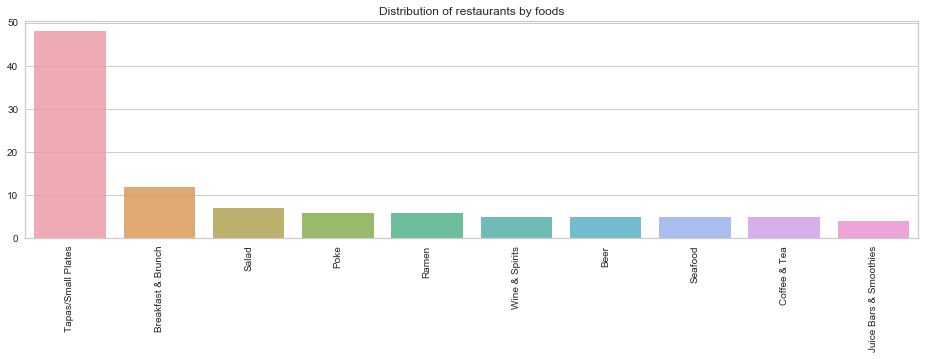

Tapas/Small Plates        48
Breakfast & Brunch        12
Salad                      7
Poke                       6
Ramen                      6
Wine & Spirits             5
Beer                       5
Seafood                    5
Coffee & Tea               5
Juice Bars & Smoothies     4
Name: colname, dtype: int64

In [272]:
buisness_cat_plot(user_x_rec[user_x_rec.food != 'nil'],'food')

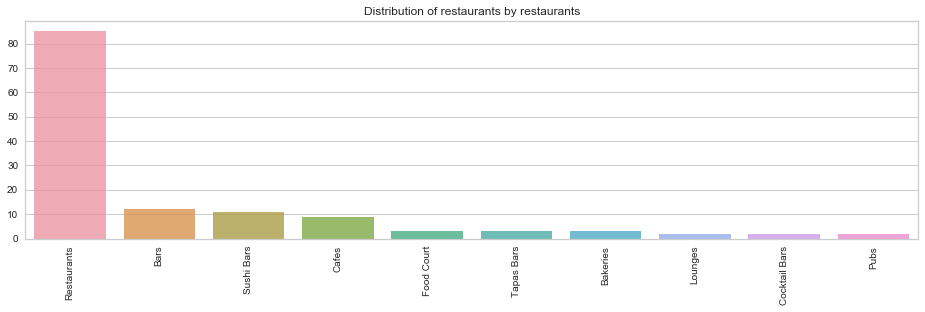

Restaurants      85
Bars             12
Sushi Bars       11
Cafes             9
Food Court        3
Tapas Bars        3
Bakeries          3
Lounges           2
Cocktail Bars     2
Pubs              2
Name: colname, dtype: int64

In [273]:
buisness_cat_plot(user_x_business[user_x_business.restaurant != 'nil'],'restaurant')

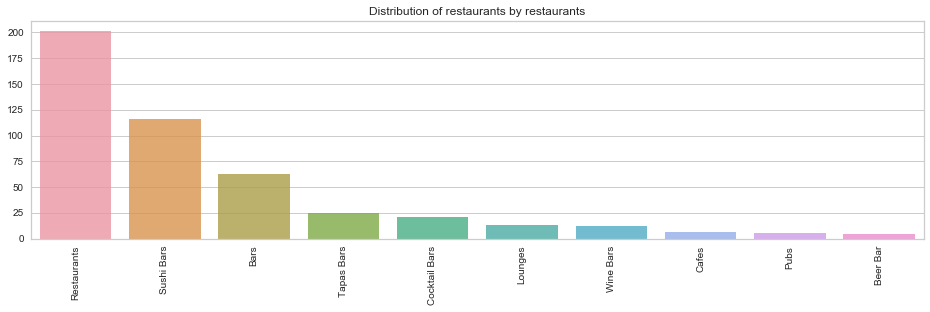

Restaurants      201
Sushi Bars       116
Bars              63
Tapas Bars        25
Cocktail Bars     21
Lounges           13
Wine Bars         12
Cafes              6
Pubs               5
Beer Bar           4
Name: colname, dtype: int64

In [274]:
buisness_cat_plot(user_x_rec[user_x_rec.restaurant != 'nil'],'restaurant')